### Sentiment Analysis on the [IMDB dataset](https://www.dropbox.com/s/rx0w6wflu8ltx4c/movie_data.csv?dl=0)

In [2]:
import pandas as pd

df = pd.read_csv('movie_data.csv')

print(len(df))

df.head(10)

50000


,review,sentiment
0,"In 1974, the teenager Martha Moxley (Maggie Gr...",1
1,OK... so... I really like Kris Kristofferson a...,0
2,"***SPOILER*** Do not read this, if you think a...",0
3,hi for all the people who have seen this wonde...,1
4,"I recently bought the DVD, forgetting just how...",0
5,Leave it to Braik to put on a good show. Final...,1
6,Nathan Detroit (Frank Sinatra) is the manager ...,1
7,"To understand ""Crash Course"" in the right cont...",1
8,I've been impressed with Chavez's stance again...,1
9,This movie is directed by Renny Harlin the fin...,1


In [2]:
list(df.review)[0]

'In 1974, the teenager Martha Moxley (Maggie Grace) moves to the high-class area of Belle Haven, Greenwich, Connecticut. On the Mischief Night, eve of Halloween, she was murdered in the backyard of her house and her murder remained unsolved. Twenty-two years later, the writer Mark Fuhrman (Christopher Meloni), who is a former LA detective that has fallen in disgrace for perjury in O.J. Simpson trial and moved to Idaho, decides to investigate the case with his partner Stephen Weeks (Andrew Mitchell) with the purpose of writing a book. The locals squirm and do not welcome them, but with the support of the retired detective Steve Carroll (Robert Forster) that was in charge of the investigation in the 70\'s, they discover the criminal and a net of power and money to cover the murder.<br /><br />"Murder in Greenwich" is a good TV movie, with the true story of a murder of a fifteen years old girl that was committed by a wealthy teenager whose mother was a Kennedy. The powerful and rich famil

#### The following snippet is directly copied from lecture 0 with little revision

In [3]:
import nltk
nltk.download('punkt') # downloads you a model

nltk.download('stopwords') # <--- this is new
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))

# print(stop)

from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import PorterStemmer 

ps = PorterStemmer() 

# return a list of tokens
def pre_processing_by_nltk(doc, stemming = True, need_sent = False):
    # step 1: get sentences
    sentences = sent_tokenize(doc)
    # step 2: get tokens
    tokens = []
    for sent in sentences:
        words = word_tokenize(sent)
        # step 3 (optional): stemming
        if stemming:
            words = [ps.stem(word) for word in words]
        if need_sent:
            tokens.append(words)
        else:
            tokens += words
    return [w.lower() for w in tokens if w not in stop]

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\云舒\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\云舒\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [4]:
df.review[:10].apply(pre_processing_by_nltk)

0    [in, 1974, ,, teenag, martha, moxley, (, maggi...
1    [ok, ..., ..., i, realli, like, kri, kristoffe...
2    [***spoiler***, do, read, thi, ,, think, watch...
3    [hi, peopl, seen, thi, wonder, movi, im, sure,...
4    [i, recent, bought, dvd, ,, forget, much, i, h...
5    [leav, braik, put, good, show, ., final, zorak...
6    [nathan, detroit, (, frank, sinatra, ), manag,...
7    [to, understand, ``, crash, cours, '', right, ...
8    [i, 've, impress, chavez, 's, stanc, globalis,...
9    [thi, movi, direct, renni, harlin, finnish, mi...
Name: review, dtype: object

### Testing Zip'f Law

In [5]:
from collections import defaultdict
freq = defaultdict(int)
import re

corpus = ' '.join(list(df.review))

new_corpus = re.sub(r'[^\w\s]', ' ', corpus)

raw_tokens = new_corpus.lower().split()
for token in raw_tokens:
    freq[token] += 1

In [6]:
print(len(freq))

101944


In [7]:
order_tokens = sorted(list(freq.items()), key = lambda x : -x[1])
print(order_tokens[:10])

[('the', 667993), ('and', 324441), ('a', 322970), ('of', 289410), ('to', 268124), ('is', 211082), ('br', 201951), ('it', 190857), ('in', 186781), ('i', 175633)]


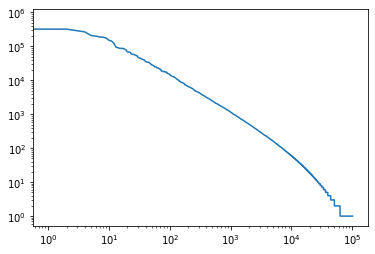

In [8]:
import matplotlib.pyplot as plt

y = [freq for token, freq in order_tokens]

plt.loglog(y)
# it is supposed to be log-linear

### Code TF-IDF ourselves!

In [8]:
from tqdm import tqdm

DF = defaultdict(float)
for doc in tqdm(df.review):
    tokens = pre_processing_by_nltk(doc)
    for token in set(tokens):
        DF[token] += 1

100%|██████████| 50000/50000 [07:56<00:00, 104.85it/s]


In [10]:
from math import log
IDF, vocab = dict(), dict()
for token in DF:
    if DF[token] < 50:
        # this becomes an unk
        pass
    else:
        vocab[token] = len(vocab)
        IDF[token] = log(1 + len(df.review) / DF[token])
print(len(DF), len(vocab))

131316 7807


In [11]:
IDF['<UNK>'] = 1
vocab['<UNK>'] = len(vocab)

In [12]:
print(vocab)

{'mother': 0, 'robert': 1, 'wealthi': 2, 'parallel': 3, 'eve': 4, 'support': 5, 'night': 6, 'backyard': 7, 'remain': 8, 'maggi': 9, ':': 10, 'year': 11, '<': 12, 'br': 13, 'simpson': 14, 'lack': 15, 'old': 16, 'influenc': 17, 'discov': 18, 'decid': 19, 'carrol': 20, 'true': 21, 'disclos': 22, 'halloween': 23, 'power': 24, 'martha': 25, 'steve': 26, 'net': 27, 'wa': 28, 'former': 29, 'writer': 30, '1974': 31, 'move': 32, 'howev': 33, 'area': 34, 'murder': 35, 'christoph': 36, 'crimin': 37, 'crime': 38, 'fifteen': 39, 'la': 40, 'mark': 41, 'whose': 42, 'day': 43, 'convict': 44, 'andrew': 45, 'detect': 46, 'retir': 47, 'write': 48, 'good': 49, 'girl': 50, '>': 51, 'kennedi': 52, 'purpos': 53, 'hous': 54, 'emot': 55, 'brazil': 56, 'welcom': 57, 'investig': 58, 'grace': 59, 'hideou': 60, 'dramat': 61, 'movi': 62, 'tv': 63, 'mitchel': 64, 'ha': 65, 'vote': 66, 'avail': 67, 'teenag': 68, '/': 69, 'local': 70, 'squirm': 71, 'disgrac': 72, 'twenti': 73, '(': 74, 'later': 75, 'money': 76, 'hi': 

In [13]:
def tfidf_feature_extractor(doc, vocab, IDF):
    tokens = pre_processing_by_nltk(doc)
    for i, token in enumerate(tokens):
        if token not in vocab:
            tokens[i] = '<UNK>'
    TF = defaultdict(int)
    for token in tokens:
        TF[token] += 1
    x = [0] * len(vocab)
    for token in set(tokens):
        tfidf = log(TF[token] + 1) * IDF[token]
        token_id = vocab[token]
#         print(token, TF[token], IDF[token])
        x[token_id] = tfidf # this will be a dense matrix
    return x


x = tfidf_feature_extractor('I love this movie movie', vocab, IDF)

In [14]:
X = []
for doc in tqdm(df.review):
    X.append(tfidf_feature_extractor(doc, vocab, IDF))
y = list(df.sentiment)

100%|██████████| 50000/50000 [02:26<00:00, 340.88it/s]


In [15]:
print(len(X), len(y))

50000 50000


In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2, shuffle=False)

print(len(X_train), len(X_test))

40000 10000


In [17]:
# train a logistic regression model
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0).fit(X_train[:1000], y_train[:1000])

clf.score(X_test, y_test)

0.8279

In [19]:
import numpy as np
np.mean(y_test)

0.4987

In [20]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer()
docs = (['The sun is shining',
         'The weather is sweet',
         'The sun is shining, the weather is sweet, and one and one is two'])
bag = count.fit_transform(docs)

print(count.vocabulary_)
print(bag.toarray())

{'the': 6, 'sun': 4, 'is': 1, 'shining': 3, 'weather': 8, 'sweet': 5, 'and': 0, 'one': 2, 'two': 7}
[[0 1 0 1 1 0 1 0 0]
 [0 1 0 0 0 1 1 0 1]
 [2 3 2 1 1 1 2 1 1]]


### TF-IDF using 3rd-party libs

In [21]:
from sklearn.feature_extraction.text import TfidfTransformer
np.set_printoptions(precision=2)

tfidf = TfidfTransformer(use_idf=True, norm='l2', smooth_idf=True)

print(tfidf.fit_transform(bag).toarray())

[[0.   0.43 0.   0.56 0.56 0.   0.43 0.   0.  ]
 [0.   0.43 0.   0.   0.   0.56 0.43 0.   0.56]
 [0.5  0.45 0.5  0.19 0.19 0.19 0.3  0.25 0.19]]


In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(strip_accents=None,
                        lowercase=True,
                        preprocessor=None,  # applied preprocessor in Data Cleaning
                        tokenizer=pre_processing_by_nltk,
                        use_idf=True,
                        norm='l2',
                        smooth_idf=True)

small_df = df.head(10000)
y = small_df.sentiment.values
X = tfidf.fit_transform(small_df.review)

print('bag-of-words features ready!')

bag-of-words features ready!


In [23]:
print(type(X))

<class 'scipy.sparse.csr.csr_matrix'>


In [24]:
from sklearn.model_selection import train_test_split
import pickle
from sklearn.linear_model import LogisticRegressionCV


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.5, shuffle=False)

clf = LogisticRegressionCV(cv=5,
                           scoring='accuracy',
                           random_state=0,
                           n_jobs=-1,
                           verbose=3,
                           max_iter=300).fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    8.1s remaining:   12.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    8.2s finished


In [25]:
clf.score(X_test, y_test)

0.8662

In [26]:
yhat = clf.predict(X_test)
yhat

array([1, 1, 0, ..., 1, 1, 0])

In [27]:
text = 'this is my favorite movie!'
x_ins = tfidf.transform([text])
clf.predict(x_ins)
clf.predict_proba(x_ins)

array([[0.07, 0.93]])

In [28]:
text = 'it was alright'
x_ins = tfidf.transform([text])
clf.predict(x_ins)
clf.predict_proba(x_ins)

array([[0.71, 0.29]])